In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data = np.array(df)
m , n =  data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]
x_dev = x_dev / 255.

data_train = data[1000:m].T
y_train = data_train[0]
x_train = data_train[1:n]
x_train = x_train / 255.
_,m_train = x_train.shape

In [41]:
x_train[: , 0].shape

(784,)



---



In [42]:
def init_params():
  w1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  w2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return w1 , b1 , w2 , b2

In [43]:
def ReLU(z):
  return np.maximum(z,0)

In [44]:
def softmax(z):
  a= np.exp(z) / sum(np.exp(z))
  return a

In [45]:
def forward_prop(w1 , b1 , w2 , b2 , x):
  z1 = w1.dot(x) + b1
  a1 = ReLU(z1)
  z2 = w2.dot(a1) + b2
  a2 = softmax(z2)
  return z1 , a1 , z2 , a2

In [46]:
def one_hot(y):
  one_hot_y = np.zeros((y.size, y.max() + 1))
  one_hot_y[np.arange(y.size), y] = 1
  one_hot_y = one_hot_y.T
  return one_hot_y

In [47]:
def deriv_ReLU(z):
  return z > 0

In [48]:
def back_prop(z1 , a1 , z2 , a2 , w1 , w2 , x , y):
  m = y.size
  one_hot_y = one_hot(y)
  dz2 = a2 - one_hot_y
  dw2 = 1/m * dz2.dot(a1.T)
  db2 = 1/m * np.sum(dz2)
  dz1 = w2.T.dot(dz2) * deriv_ReLU(z1)
  dw1 = 1/m * dz1.dot(x.T)
  db1 = 1/m * np.sum(dz1)
  return dw1 , db1 , dw2 , db2

In [49]:
def update_params(w1 , b1 , w2 , b2 , dw1 , db1 , dw2 , db2 , alpha):
  w1 = w1 - alpha * dw1
  b1 = b1 - alpha * db1
  w2 = w2 - alpha * dw2
  b2 = b2 - alpha * db2
  return w1 , b1 , w2 , b2



---



In [50]:
def get_predictions(a2):
  return np.argmax(a2 , 0)

In [51]:
def get_accuracy(predictions , y):
  print(predictions , y)
  return np.sum(predictions == y) / y.size

In [52]:
def grad_descent(x , y , alpha , iterations):
  w1 , b1 , w2 , b2 = init_params()
  for i in range(iterations):
    z1 , a1 , z2 , a2 = forward_prop(w1 , b1 , w2 , b2 , x)
    dw1 , db1 , dw2 , db2 = back_prop(z1 , a1 , z2 , a2 , w1 , w2 , x , y)
    w1 , b1 , w2 , b2 = update_params(w1 , b1 , w2 , b2 , dw1 , db1 , dw2 , db2 , alpha)
    if i % 10 == 0:
      print("Iteration : " , i)
      predictions = get_predictions(a2)
      print("Accuracy: " , get_accuracy(predictions , y))
  return w1 , b1 , w2 , b2



---



In [53]:
W1, b1, W2, b2 = grad_descent(x_train, y_train, .10, 500)

Iteration :  0
[8 8 0 ... 0 5 5] [8 3 2 ... 0 1 9]
Accuracy:  0.1954878048780488
Iteration :  10
[2 8 6 ... 0 5 5] [8 3 2 ... 0 1 9]
Accuracy:  0.2807317073170732
Iteration :  20
[2 3 6 ... 0 5 5] [8 3 2 ... 0 1 9]
Accuracy:  0.38765853658536586
Iteration :  30
[2 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.4669756097560976
Iteration :  40
[2 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.5219512195121951
Iteration :  50
[2 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.5658536585365853
Iteration :  60
[8 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.6025853658536585
Iteration :  70
[8 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.6320731707317073
Iteration :  80
[8 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.6563170731707317
Iteration :  90
[8 3 6 ... 0 1 5] [8 3 2 ... 0 1 9]
Accuracy:  0.675829268292683
Iteration :  100
[8 3 6 ... 0 1 8] [8 3 2 ... 0 1 9]
Accuracy:  0.6920731707317073
Iteration :  110
[8 3 6 ... 0 1 8] [8 3 2 ... 0 1 9]
Accuracy:  0.7066097560975609
Iteration :  12



---



In [54]:
def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, W2, b2, x)
    predictions = get_predictions(a2)
    return predictions

In [58]:
def test_prediction(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()



---



Prediction:  [8]
Label:  8


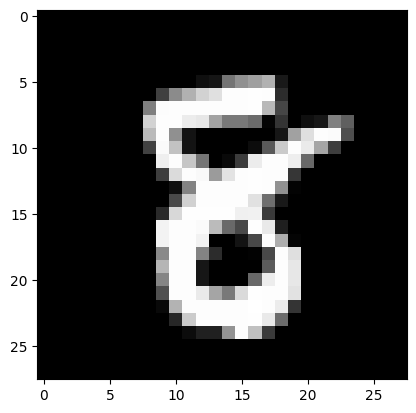

Prediction:  [3]
Label:  3


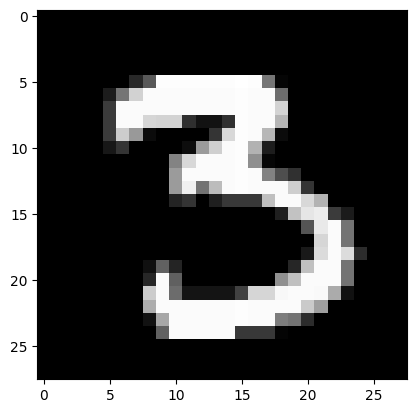

Prediction:  [4]
Label:  4


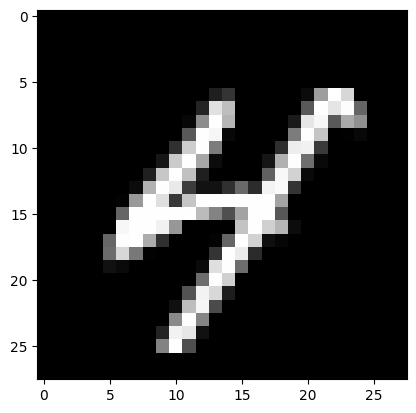

Prediction:  [1]
Label:  2


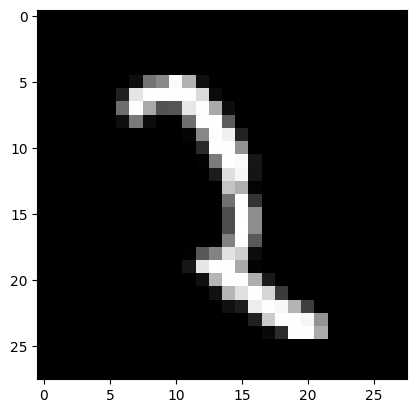

In [61]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [64]:
dev_predictions = make_predictions(x_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, y_dev)

[1 1 5 9 2 1 6 1 8 1 8 7 9 0 2 1 2 6 0 9 5 4 7 9 1 7 7 1 9 0 9 8 8 8 5 4 5
 0 5 6 7 8 4 1 2 2 4 6 3 2 7 6 8 0 7 7 4 2 4 2 7 1 1 2 0 0 5 7 5 0 9 8 4 4
 6 6 6 6 1 1 7 9 1 8 2 9 8 6 6 8 6 1 9 8 1 3 5 9 7 6 2 9 6 6 5 4 1 1 2 0 4
 4 4 9 7 2 4 1 9 5 8 5 7 8 1 3 7 2 4 4 5 6 3 2 1 4 5 5 0 6 3 7 2 3 4 1 9 4
 2 1 8 4 2 6 7 8 4 6 6 2 3 4 4 7 0 5 6 9 0 6 8 4 7 2 9 8 4 5 0 2 4 6 9 2 3
 5 0 8 9 7 0 4 7 4 7 8 5 1 2 3 6 4 2 2 1 6 6 3 1 2 1 5 5 0 2 8 3 6 3 7 9 4
 0 3 3 6 0 7 0 6 9 1 8 4 5 2 4 1 2 6 6 9 4 2 6 8 4 8 1 2 7 7 7 2 4 9 8 6 3
 9 9 9 6 3 0 1 9 0 0 8 8 6 5 8 4 7 4 8 4 1 8 2 8 9 3 1 3 9 2 8 9 4 8 0 6 5
 5 4 0 7 4 8 3 1 2 7 9 0 9 6 8 3 4 1 5 0 7 3 0 8 8 4 4 9 6 3 2 6 3 1 9 8 3
 8 0 0 9 4 0 3 2 9 2 3 3 6 6 5 1 0 6 4 5 4 5 6 4 4 6 7 5 1 1 9 0 1 3 0 7 4
 8 2 6 2 2 0 8 6 5 5 8 9 6 4 4 9 8 5 7 9 8 7 6 3 8 3 9 6 9 2 2 7 0 8 1 7 9
 8 5 9 9 3 1 9 6 9 6 8 7 1 3 6 0 9 9 6 6 2 7 4 2 6 8 8 6 3 7 4 3 4 3 0 2 9
 4 9 8 8 1 4 6 6 8 5 9 3 1 8 3 3 9 2 6 7 2 7 1 8 7 5 9 2 9 6 2 0 2 9 6 9 8
 5 1 1 7 5 2 3 0 3 5 0 1 

0.839